# Regressão Linear

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"C:\Users\gilso\Documents\FACULDADE\Eng de Software\1° ano\PROJETOS\SIJIA\challenger-SijiA\SPRINT_MATEMÁTICA\dados_geral.xlsx")
df

,Quiz,Acertos,Erros,Acertos(%),Média tempo resposta(s),Duração do quiz(min),Status
0,Exame - Hemograma,3,7,30,30.0,5.000000,REPROVADO
1,Exame - Hemograma,2,8,20,34.4,5.733333,REPROVADO
2,Exame - Hemograma,4,6,40,33.4,5.566667,REPROVADO
3,Exame - Hemograma,3,7,30,32.6,5.433333,REPROVADO
4,Exame - Hemograma,5,5,50,31.2,5.200000,REPROVADO
...,...,...,...,...,...,...,...
395,Exame - Hemograma,7,3,70,20.5,3.416667,REPROVADO
396,Exame - Hemograma,10,0,100,16.4,2.733333,APROVADO
397,Exame - Hemograma,5,5,50,23.2,3.866667,REPROVADO
398,Exame - Hemograma,9,1,90,20.5,3.416667,REPROVADO


In [3]:
df.shape

(400, 7)

In [4]:
df.dtypes

Quiz                        object
Acertos                      int64
Erros                        int64
Acertos(%)                   int64
Média tempo resposta(s)    float64
Duração do quiz(min)       float64
Status                      object
dtype: object

In [5]:
df = df.astype({"Acertos(%)": float})
df = df.astype({"Acertos": float})
df = df.astype({"Erros": float})

In [6]:
df.dtypes

Quiz                        object
Acertos                    float64
Erros                      float64
Acertos(%)                 float64
Média tempo resposta(s)    float64
Duração do quiz(min)       float64
Status                      object
dtype: object

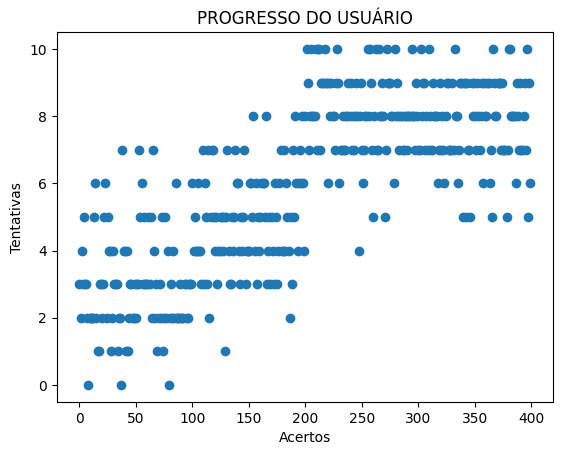

In [7]:
tentativas = range(len(df))
acertos = df['Acertos']
duracao = df['Média tempo resposta(s)']

plt.scatter(tentativas, acertos)
plt.title('PROGRESSO DO USUÁRIO')
plt.xlabel('Acertos')
plt.ylabel('Tentativas')
plt.show()

In [8]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [9]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [10]:
# Criação do modelo
#               eixo    y            x
regressao = smf.ols('tentativas ~ acertos', data = df).fit()

In [11]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             tentativas   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     546.3
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           1.13e-76
Time:                        10:01:25   Log-Likelihood:                -2294.4
No. Observations:                 400   AIC:                             4593.
Df Residuals:                     398   BIC:                             4601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.1702      9.568     -0.645      0.5

In [12]:
regressao.params

Intercept    -6.170163
acertos      34.639185
dtype: float64

C:\Users\gilso\AppData\Local\Temp\ipykernel_31580\3170914987.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')


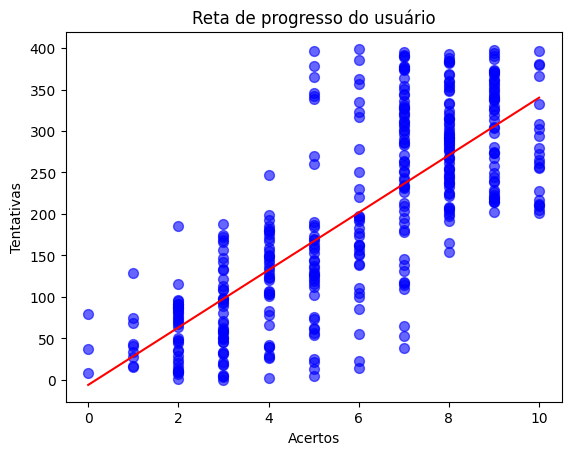

In [13]:
plt.scatter(y=tentativas, x=acertos, color='blue', s=50, alpha=0.6)
X_plot = np.linspace(0, 10)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de progresso do usuário')
plt.ylabel('Tentativas')
plt.xlabel('Acertos')
plt.show()

# Regressão Polinomial

In [14]:
modelo2 = np.poly1d(np.polyfit(acertos, tentativas, 2))

In [15]:
y2 = modelo2(acertos)
y2

array([ 97.57700236,  56.32310778, 136.69026703,  97.57700236,
       173.66290177,  97.57700236,  97.57700236,  56.32310778,
       -32.60657115,  56.32310778,  56.32310778,  56.32310778,
        56.32310778, 173.66290177, 208.4949066 ,  56.32310778,
        12.92858328,  12.92858328,  97.57700236,  97.57700236,
        56.32310778,  97.57700236, 173.66290177, 208.4949066 ,
        56.32310778, 173.66290177, 136.69026703, 136.69026703,
        12.92858328,  56.32310778, 136.69026703,  97.57700236,
        97.57700236,  97.57700236,  12.92858328,  56.32310778,
        56.32310778, -32.60657115, 241.1862815 , 136.69026703,
       136.69026703,  12.92858328, 136.69026703,  12.92858328,
        56.32310778,  97.57700236,  97.57700236,  56.32310778,
        56.32310778,  97.57700236,  56.32310778,  97.57700236,
        97.57700236, 241.1862815 , 173.66290177, 208.4949066 ,
        97.57700236, 173.66290177,  97.57700236,  97.57700236,
        97.57700236, 173.66290177,  97.57700236, 173.66

In [16]:
modelo2.coef

array([ -1.07031496,  46.60546938, -32.60657115])

In [17]:
print("Equação: tentativa = {:.1f}*acertos^2 + {:.1f}*acertos + {:.1f}".format(modelo2.coef[0], modelo2.coef[1], modelo2.coef[2]))

Equação: tentativa = -1.1*acertos^2 + 46.6*acertos + -32.6


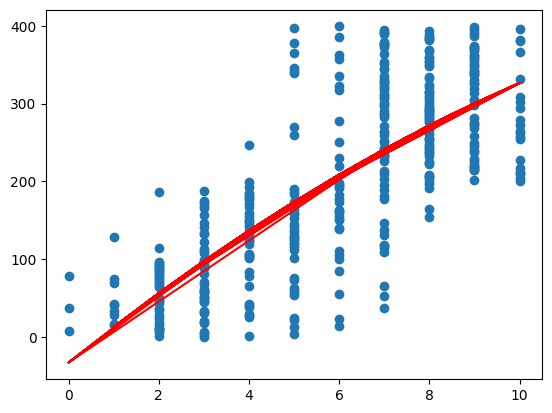

In [18]:
plt.scatter(acertos, tentativas)
plt.plot(acertos,y2,color='red')